## image resize

In [ ]:
import cv2

In [ ]:
img = cv2.imread("/content/IMG_2678.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

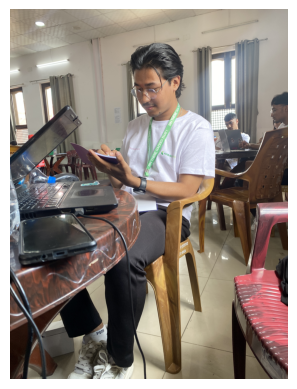

In [ ]:
plt.imshow(img)
plt.axis("off")

In [ ]:
img.shape

(4032, 3024, 3)

In [ ]:
img = cv2.resize(img, (756, 1008))

In [ ]:
img.shape

(1008, 756, 3)

## Image Augmentation

In [ ]:
from skimage.transform import rotate

In [ ]:
rotClock = rotate(img, 45)
rotAntiClock = rotate(img , -45)

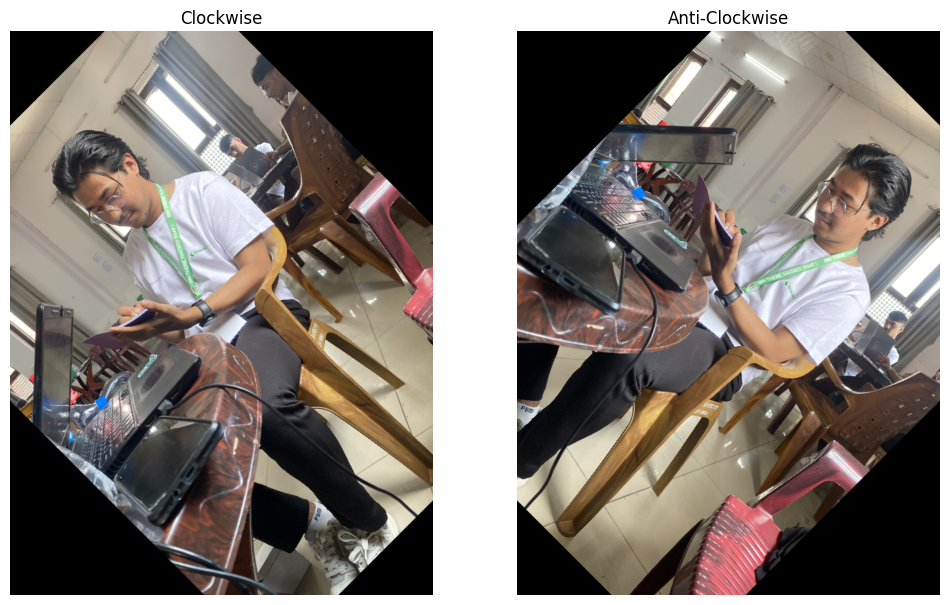

In [ ]:
plt.figure(figsize = (12,10))
plt.subplot(1,2,1)
plt.imshow(rotClock)
plt.axis("off")
plt.title("Clockwise")

plt.subplot(1,2,2)
plt.imshow(rotAntiClock)
plt.axis("off")
plt.title("Anti-Clockwise")

plt.imsave("clockRot.png", rotClock)
plt.imsave("antiClockRot.png", rotAntiClock)

In [ ]:
from skimage.transform import SimilarityTransform, warp
tform = SimilarityTransform(translation=(100, -100))
warped = warp(img, tform)

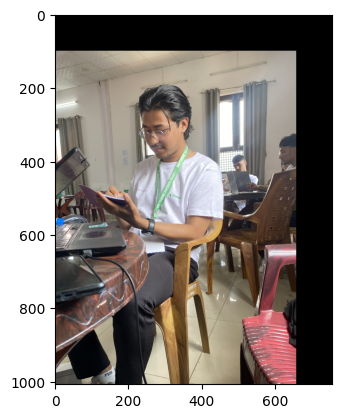

In [ ]:
plt.imshow(warped)
plt.imsave("translation.png", warped)

In [ ]:
img.shape

(1008, 756, 3)

In [ ]:
# scalling
from skimage.transform import rescale
rescaled = rescale(img, 2, channel_axis=-1)

In [ ]:
rescaled.shape  # change in shape

(2016, 1512, 3)

Text(0.5, 1.0, 'Scaled')

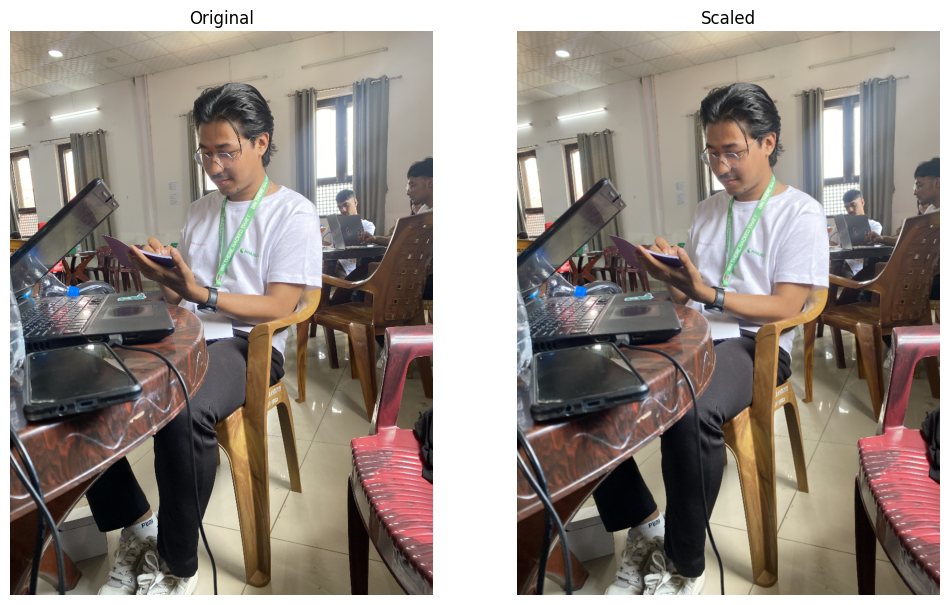

In [ ]:
plt.figure(figsize = (12,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("off")
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(rescaled)
plt.axis("off")
plt.title("Scaled")

In [ ]:
# resize
from skimage.transform import resize
resized = resize(img, (500,500), anti_aliasing=False)

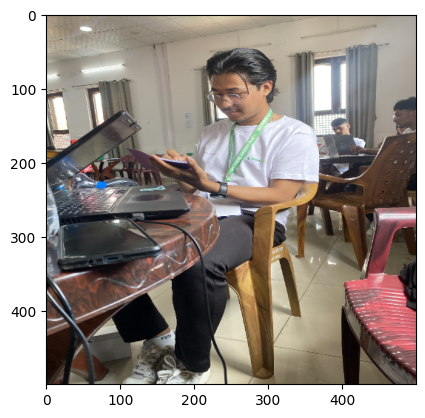

In [ ]:
plt.imshow(resized)
plt.imsave("resized.png", resized)

In [ ]:
from skimage.transform import swirl

In [ ]:
swirled = swirl(img, rotation=0, strength=10, radius=360)

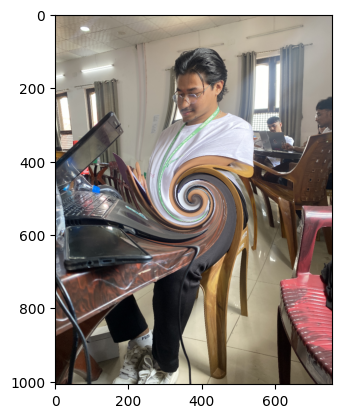

In [ ]:
plt.imshow(swirled)
plt.imsave("swirled.png", swirled)

## converting to binary image

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

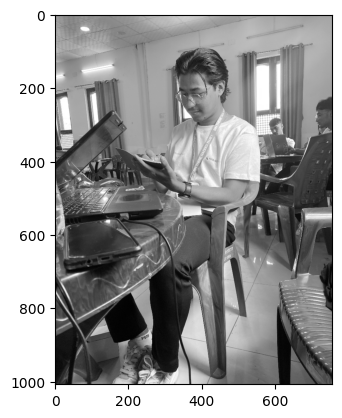

In [ ]:
plt.imshow(gray_img, cmap="gray")

In [ ]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(gray_img)


In [ ]:
thresh

np.int64(116)

In [ ]:
binary = gray_img > thresh

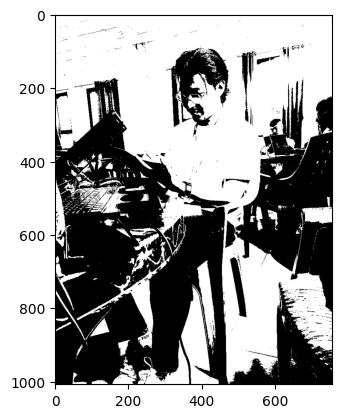

In [ ]:
plt.imshow(binary, cmap="gray")

## Morphology Implementation

In [ ]:
binary_img = cv2.imread("/content/cat.png", cv2.IMREAD_GRAYSCALE)
inverted_img = cv2.bitwise_not(binary_img)


In [ ]:
_, mouse_binary = cv2.threshold(inverted_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

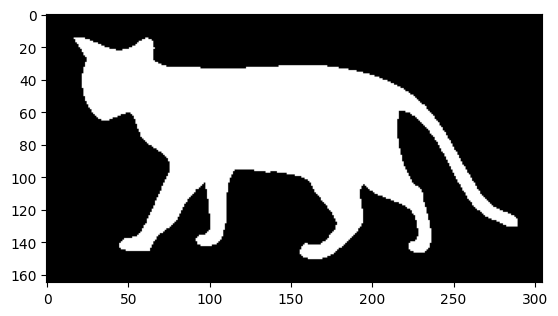

In [ ]:
plt.imshow(mouse_binary, cmap="gray")

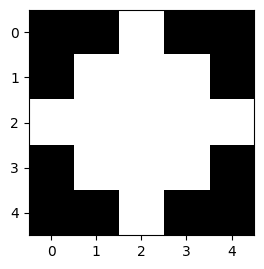

In [ ]:
from skimage import morphology
shape_disk = morphology.disk(2)
plt.subplot(1,2,2)
plt.imshow(shape_disk, cmap = 'gray')

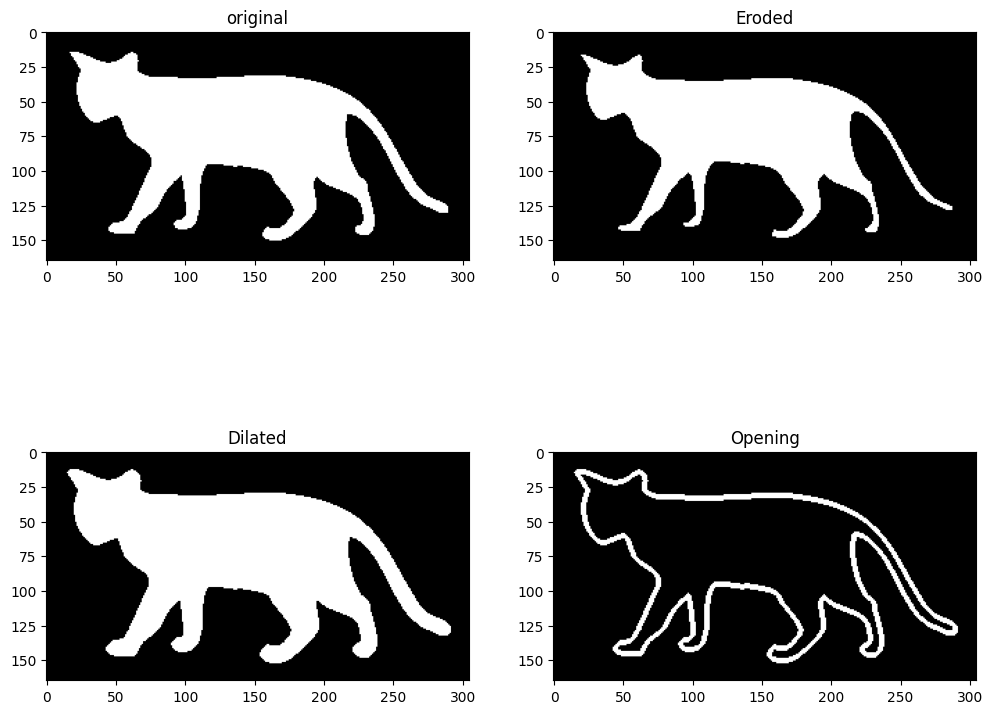

In [ ]:
eroded = morphology.binary_erosion(mouse_binary, footprint = shape_disk)

dilated = morphology.binary_dilation(mouse_binary, footprint = shape_disk)

opened = morphology.binary_opening(mouse_binary, footprint = shape_disk)

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(mouse_binary, cmap ='gray')
plt.imsave("mouse.png",mouse_binary, cmap='gray')

plt.subplot(2,2,2)
plt.title('Eroded')
plt.imshow(eroded, cmap = 'gray')
plt.imsave("eroded.png", eroded, cmap="gray")

plt.subplot(2,2,3)
plt.title('Dilated')
plt.imshow(dilated, cmap = 'gray')
plt.imsave("dilated.png", dilated, cmap="gray")


gradient = dilated ^ eroded

plt.subplot(2,2,4)
plt.title('Opening')
plt.imshow(gradient, cmap = 'gray')
plt.imsave("gradient.png", gradient, cmap="gray")

## image inpanting

In [ ]:
img.shape

(1008, 756, 3)

In [ ]:
import numpy as np

In [ ]:

mask = np.zeros(img.shape, np.uint8)

In [ ]:
mask[100:150, 120:290] = 1

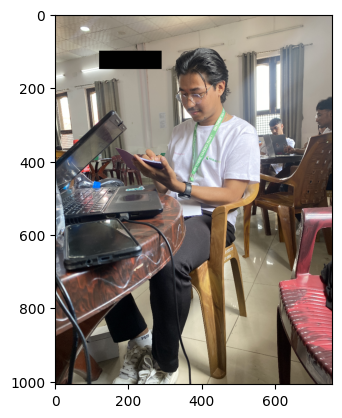

In [ ]:

# degrade image
degrade_img = img.copy()
plt.imshow(degrade_img)

degrade_img[mask == 1] = 1
plt.imshow(degrade_img)

plt.imsave("damaged_img.png", degrade_img)

In [ ]:

from skimage.restoration import inpaint

restored_biharmonic = inpaint.inpaint_biharmonic(degrade_img, mask)

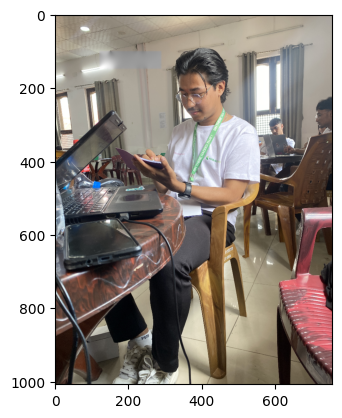

In [ ]:
plt.imshow(restored_biharmonic)
plt.imsave("restored_img.png",restored_biharmonic )

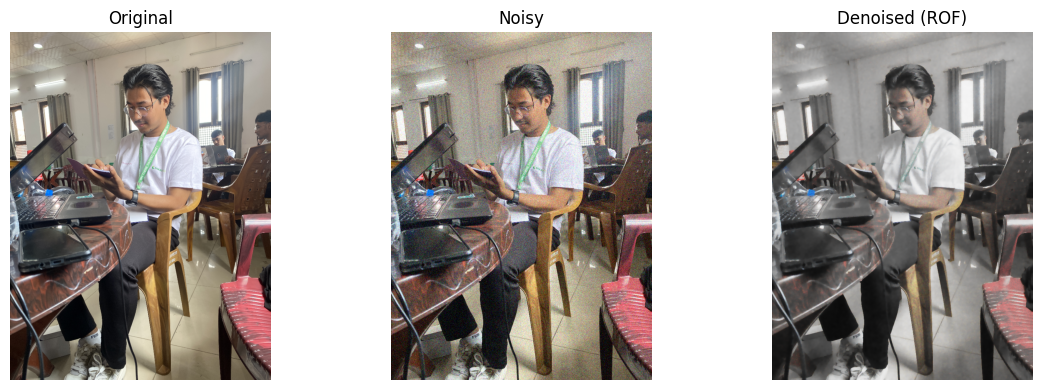

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float, color
from skimage.restoration import denoise_tv_chambolle
from skimage.util import random_noise

# Load and convert to grayscale
image = img

# Add Gaussian noise
noisy = random_noise(image, mode='gaussian', var=0.01)

# Apply ROF Total Variation Denoising
lambda_val = 0.1  # Regularization parameter
denoised = denoise_tv_chambolle(noisy, weight=lambda_val)

# Plot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Noisy')
plt.imshow(noisy, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Denoised (ROF)')
plt.imshow(denoised, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
